In [2]:
import cvxpy as cp
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import dccp
import math
import scipy as sp
from scipy import sparse
import scipy.interpolate as interpolate
#from mpl_toolkits.mplot3d import Axes3D


#parameters
listx = np.array([0.3,0.5,0.6])#x for the barriers
listy = np.array([0.3,0.5,0.7])#y for the barriers
r = np.array([0.1,0.2,0.1])# radius for barriers
startpoint = np.array([0,0])
endpoint = np.array([1.2,1.2])

#Parameters for the mpc control
Ts = 0.15 #sampletime
DesireSpeed = 0.3#m/s
initpose = np.array([0,0,0])
pose = np.array([0,0,0])
umax = np.array([0.5,0.5,0.5])# ([maxspeed for x, for y , for w])
umin = np.array([-0.5,-0.5,-0.5])# ([maxspeed for x, for y , for w])
dumax = np.array([0.2,0.2,0.2])# the  accelerations of vx,vy,w
dumin = np.array([-0.2,-0.2,-0.2])
N = 5 # Prediction horizon
resolution = 0.1# the distance of equdistpoint.

# weighting matrix function
Q = sparse.diags([1.,1.,1.])
QN = Q *10
R = 0.1*sparse.eye(3)

In [3]:
def DCCP_planning(listx, listy, r, startpoint, end_point):
    time_start=time.time()
    #l = 10
    n = 50
    a = np.matrix(startpoint).T
    b = np.matrix(end_point).T
    d = 2
    #listx是obstacle的x轴，listy是obstacle的y轴，r是半径
    # listx = [16.3,14.7,15.5,16.3,17.3,18,18.5,15.5,15.5,16.3,17.65,17.65,17.65,17.65]
    # listy = [8.3,6.7,10.3,6.3,10,6.8,8.7,0.5,5,2.5,3.65,2.95,2.25,1.55]
    # r = [1.4,0.3,0.3,0.3,0.3,0.3,0.3,0.5,0.5,0.7,0.35,0.35,0.35,0.35]
    p = np.matrix([listx,listy])
    m = len(listx)
    x = []
    for i in range(n+1):
        x += [cp.Variable((d, 1))]
    L = cp.Variable(1)
    constr = [x[0] == a, x[n] == b]
    # constr += [x>=14]
    cost = L
    for i in range(n):
        constr += [cp.norm(x[i]-x[i+1]) <= L/n]
        for j in range(m):
            constr += [cp.norm(x[i]-p[:,j]) >= r[j]+0.1]
            #rectangular
            # constr += [abs(x[i][0]-2.5)+abs(x[i][1]-11 >= 2+0.1)]
    prob = cp.Problem(cp.Minimize(cost), constr)
    print("begin to solve")
    result = prob.solve(method='dccp')
    print("end") 
    dccp_path = np.array([]) 
    for xx in x:
        dccp_path = np.append(dccp_path,xx.value)
    dccp_path = dccp_path.reshape(math.floor((len(dccp_path)/2)),2).T
    time_end=time.time()
    print("time =", time_end - time_start)
    return(dccp_path)
    


def circle_draw(x0,y0,r,ax):
    circ = np.linspace(0,2*math.pi,50)
    x = []
    y = []
    for i in circ:
        x.append(x0 + r*math.cos(i))
        y.append(y0 + r*math.sin(i))
    ax.plot(x, y,'b')

def rect(cen_point, man_r):
        p1 = (cen_point[0], cen_point[1] + man_r)
        p2 = (cen_point[0] - man_r, cen_point[1])
        p3 = (cen_point[0], cen_point[1] - man_r)
        p4 = (cen_point[0] + man_r, cen_point[1])
        x = [p1[0],p2[0],p3[0],p4[0],p1[0]]
        y = [p1[1],p2[1],p3[1],p4[1],p1[1]]
        plt.plot(x,y,'b')

def line(start,end):
    x = [start[0],end[0]]
    y = [start[1],end[1]]
    plt.plot(x,y,'#000000')

def line2(start,end):
    x = [start[0],end[0]]
    y = [start[1],end[1]]
    plt.plot(x,y,'b')

    #listx是obstacle的x轴，listy是obstacle的y轴，r是半径

dccp_path = DCCP_planning(listx,listy,r,startpoint,endpoint)
#fig, ax = plt.subplots(figsize = (20,20))
#for i in range(len(listx)):
#    circle_draw(listx[i],listy[i],r[i],ax)
#ax.plot(dccp_path[0,:], dccp_path[1,:], 'r-',markersize = 10,label = "dccp path points")
#ax.legend(fontsize= 20)
#plt.show()

begin to solve
end
time = 15.586993217468262


In [5]:
#processing the waypoint to get the ref

#cvxp = np.array([[1.03000000000000,1.02980000000000,1.03940000000000,1.05680000000000,1.07970000000000,1.10600000000000,1.13370000000000,
#1.16050000000000,1.18440000000000,1.20310000000000,1.21460000000000,1.21660000000000,1.20720000000000,1.18410000000000,1.14520000000000,1.08830000000000,
#1.01140000000000,0.912200000000001,0.788700000000000,0.638700000000000,0.460000000000000,
#0.250600000000000,0.0800000000000003,0.0179000000000002,0.00999999999999998],[0,
#0.00100000000000033,0.0111000000000003,0.0299000000000000,0.0567000000000002,0.0909000000000000,0.131900000000000,0.179200000000000,0.232100000000000,0.290000000000000,0.352300000000000,0.418600000000000,0.488000000000000,0.560200000000000,0.634400000000000,
#0.710100000000000,0.786700000000000,0.863600000000000,0.940100000000000,1.01580000000000,
#1.09000000000000,1.16210000000000,1.16000000000000,1.01160000000000,0.790000000000000]])
cvxp=dccp_path
cvxd =np.zeros(len(cvxp[0]))

cvxp = np.insert(cvxp,0,initpose[0:2],axis=1)
cvxp_x = cvxp[0,:]
cvxp_y = cvxp[1,:]
for i in range(12):
    cvxp_x = cvxp_x.repeat(2)[:-1]
    cvxp_y = cvxp_y.repeat(2)[:-1]
    cvxp_x[1::2] += (cvxp_x[2::2]-cvxp_x[1::2])/2
    cvxp_y[1::2] += (cvxp_y[2::2]-cvxp_y[1::2])/2
cvxp_x,cvxp_y
distance = np.sqrt(np.ediff1d(cvxp_x)**2+np.ediff1d(cvxp_y)**2)
d = 0.0
equdist_waypoint = np.array([[cvxp_x[0]],[cvxp_y[0]],[cvxd[0]]])
for i in range(len(distance)):
    d = distance[i] + d
    if d >= resolution:
        equdist_waypoint = np.append(equdist_waypoint,[[cvxp_x[i]],[cvxp_y[i]],[cvxd[0]]],axis=1)
        d = 0.0
equdist_waypoint = np.append(equdist_waypoint,[[cvxp_x[-1]],[cvxp_y[-1]],[cvxd[-1]]],axis=1)
tVec2 = np.linspace(0,len(equdist_waypoint[0,:]),num=int(len(equdist_waypoint[0,:])))
tVec = np.linspace(0,len(equdist_waypoint[0,:]),num=int(len(equdist_waypoint[0,:])*(resolution/(DesireSpeed*Ts))))
f = interpolate.interp1d(tVec2,equdist_waypoint,kind='cubic')
ref = f(tVec)

In [6]:
#the dynamic 
def cal_M(theta,Ts):
    M = np.zeros((3,3))
    M[0,0] = np.cos(theta)*Ts
    M[0,1] = np.sin(theta)*(-1)*Ts
    M[1,0] = np.sin(theta)*Ts*(-1)
    M[1,1] = np.cos(theta)*Ts*(-1)
    M[2,2] = 1*Ts
    return M

# Define problem
u = cp.Variable((3, N))
x = cp.Variable((3, N+1))
x_init = cp.Parameter(3)
M = cp.Parameter((3,3))
xr = cp.Parameter((3,N+1))
objective = 0
constraints = [x[:,0] == x_init]
for k in range(N):
    Q = Q  * N *0.5
    objective += cp.quad_form(x[:,k] - xr[:,k], Q) + cp.quad_form(u[:,k], R)
    constraints += [x[:,k+1] == x[:,k] + np.dot(M,u[:,k])]
    constraints += [umin <= u[:,k], u[:,k] <= umax]
    if k >0:
        constraints += [dumin*Ts <= u[:,k]-u[:,k-1], u[:,k]-u[:,k-1] <= dumax*Ts]
objective += cp.quad_form(x[:,N] - xr[:,N], QN)
prob = cp.Problem(cp.Minimize(objective), constraints)


/home/jakeluo/anaconda3/lib/python3.8/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/jakeluo/anaconda3/lib/python3.8/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/jakeluo/anaconda3/lib/python3.8/site-package

In [7]:
# 测试环境：Python 3.6 版本

import socket
import sys

# 组网模式下，机器人当前 IP 地址为 192.168.0.115, 控制命令端口号为 40923
# 机器人 IP 地址根据实际 IP 进行修改
host = "192.168.50.76"
port = 40923

address = (host, int(port))

# 与机器人控制命令端口建立 TCP 连接
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

print("Connecting...")

s.connect(address)

print("Connected!")

def command(s,msg):
    msg +=';'
    print ('send -> ', msg)
    s.send(msg.encode('utf-8'))
    try:
            # 等待机器人返回执行结果
        buf = s.recv(1024)
        print(buf.decode('utf-8'))
    except socket.error as e:
        print("Error receiving :", e)
        sys.exit(1)
            
#connect to the S1
command(s,'command')

def sendcommand(s,command1):
    spell = 'chassis speed x '+ str(command1[0])+' y '+str(command1[1])+' z '+str(command1[2])
    print(spell)
    command(s,spell)

Connecting...
Connected!
send ->  command;
ok;


In [8]:
sendcommand(s,np.zeros(3))
command(s,'chassis move x 0 y 0 z 0')

chassis speed x 0.0 y 0.0 z 0.0
send ->  chassis speed x 0.0 y 0.0 z 0.0;
ok;
send ->  chassis move x 0 y 0 z 0;
ok;


In [17]:
# Simulate in closed loop
last_ref = ref[:,-1]
for i in range(N-1):
    last_ref = np.append(last_ref,ref[:,-1])
last_ref = last_ref.reshape((N,3)).T
fianlusingref = np.append(ref,last_ref,axis=1)
nsim = len(ref[0,:])
path = np.array([])
com = np.array([])
pose = initpose
path =np.append(path,pose)
for i in range(nsim):
    start_time = time.time()
    x_init.value = pose
    #print(x0)
    #print(u.value)
    M.value = cal_M(pose[2],Ts)  
    #print(ref[:,i:i+N+1])
    xr.value = fianlusingref[:,i:i+N+1]
    #print(M.value)
    prob.solve(solver=cp.OSQP, warm_start=True)
    #print(prob.is_dcp())
    #print(dccp.is_dccp(prob))
    #prob.solve(method="dccp")
    pose = pose + np.dot(M.value ,(u[:,0].value))
    #print(u.value)
    #print(x0)
    path = np.append(path,pose)
    com = np.append(com,u[:,0].value)
    end_time = time.time()
    run_time = end_time - start_time
    #print(end_time-start_time)
    wait_t = Ts-(end_time-start_time)
    if wait_t >= 0:
        time.sleep(wait_t)
    else:
         print(wait_t) 
    command1 = u[:,0].value
    sendcommand(s,command1)
time.sleep(Ts)
sendcommand(s,np.zeros(3))
command(s,'chassis move x 0 y 0 z 0')
com = com.reshape((nsim,3)).T   
path = path.reshape((nsim+1,3)).T


chassis speed x 0.2822008524552163 y -0.08594098918092358 z 0.0
send ->  chassis speed x 0.2822008524552163 y -0.08594098918092358 z 0.0;
ok;
chassis speed x 0.2819885139908547 y -0.08569242785122555 z 0.0
send ->  chassis speed x 0.2819885139908547 y -0.08569242785122555 z 0.0;
ok;
chassis speed x 0.2819081566016338 y -0.08566236684600698 z 0.0
send ->  chassis speed x 0.2819081566016338 y -0.08566236684600698 z 0.0;
ok;
chassis speed x 0.2817918635160807 y -0.0859100395176213 z 0.0
send ->  chassis speed x 0.2817918635160807 y -0.0859100395176213 z 0.0;
ok;
chassis speed x 0.2817030827138076 y -0.08616556197482193 z 0.0
send ->  chassis speed x 0.2817030827138076 y -0.08616556197482193 z 0.0;
ok;
chassis speed x 0.2819468294723817 y -0.0858265309763366 z 0.0
send ->  chassis speed x 0.2819468294723817 y -0.0858265309763366 z 0.0;
ok;
chassis speed x 0.28224140440802353 y -0.08538731565473309 z 0.0
send ->  chassis speed x 0.28224140440802353 y -0.08538731565473309 z 0.0;
ok;
chassis 

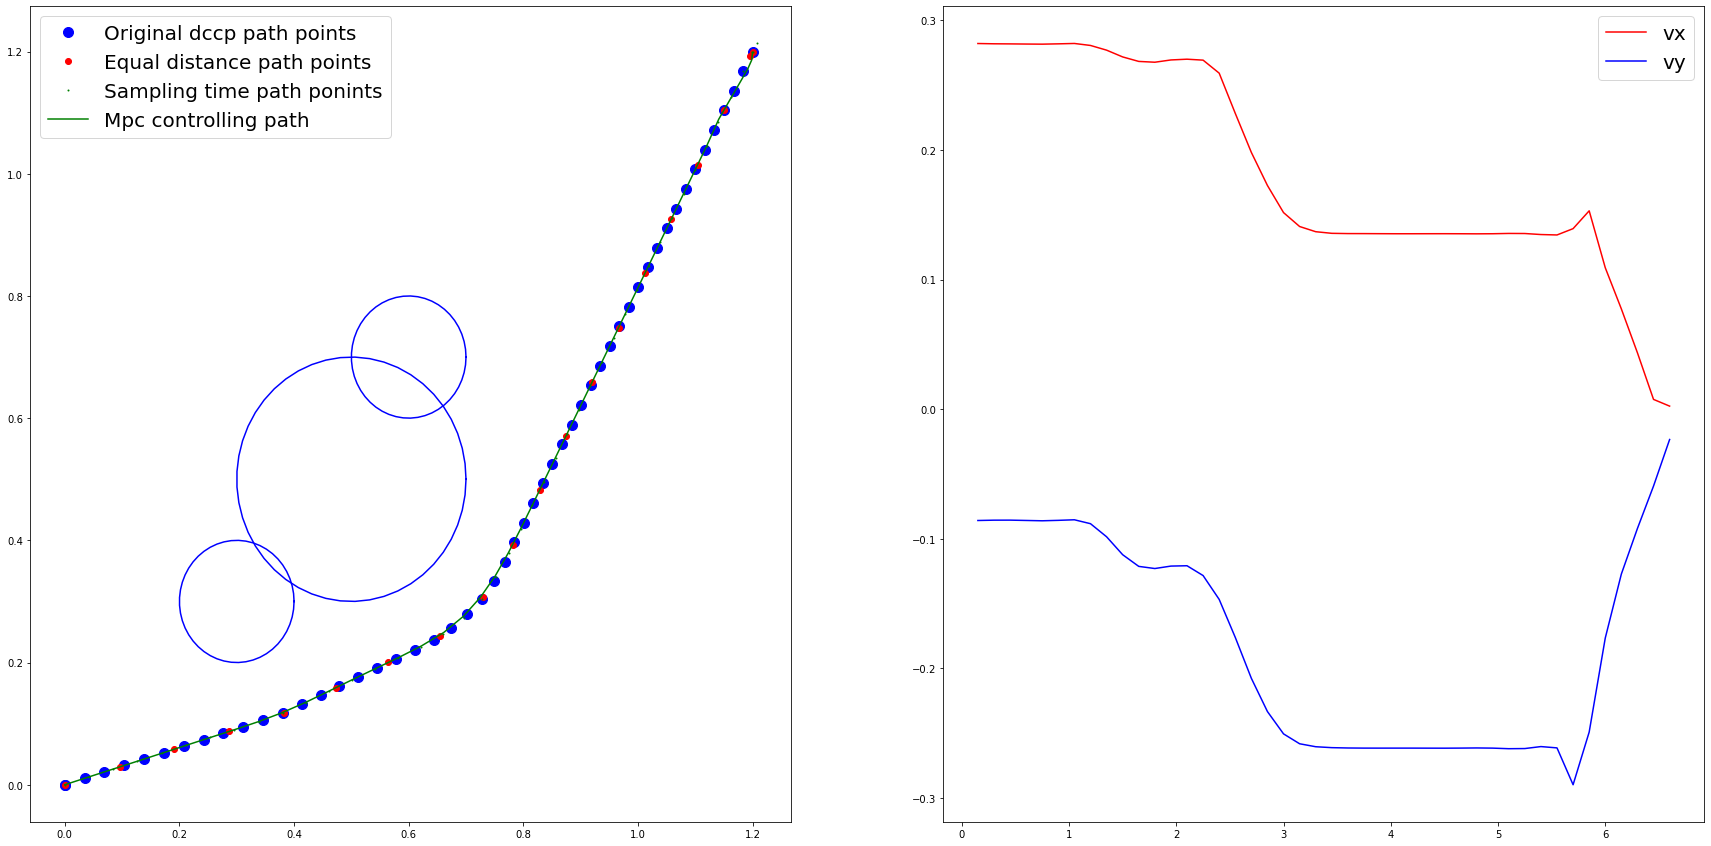

[[ 0.28220085 -0.08594099  0.        ]
 [ 0.28198851 -0.08569243  0.        ]
 [ 0.28190816 -0.08566237  0.        ]
 [ 0.28179186 -0.08591004  0.        ]
 [ 0.28170308 -0.08616556  0.        ]
 [ 0.28194683 -0.08582653  0.        ]
 [ 0.2822414  -0.08538732  0.        ]
 [ 0.28070334 -0.08840556  0.        ]
 [ 0.27708243 -0.09849661  0.        ]
 [ 0.27185458 -0.11233954  0.        ]
 [ 0.26838351 -0.12135696  0.        ]
 [ 0.26776106 -0.1230129   0.        ]
 [ 0.26951672 -0.12112904  0.        ]
 [ 0.27009878 -0.12086342  0.        ]
 [ 0.26937184 -0.1284372   0.        ]
 [ 0.2593248  -0.14684605  0.        ]
 [ 0.22830569 -0.17615625  0.        ]
 [ 0.19814772 -0.20774603  0.        ]
 [ 0.1726271  -0.23340584  0.        ]
 [ 0.15171104 -0.25062977  0.        ]
 [ 0.14096152 -0.25826505  0.        ]
 [ 0.13695135 -0.26055367  0.        ]
 [ 0.13570339 -0.2612627   0.        ]
 [ 0.13550669 -0.26152466  0.        ]
 [ 0.1354831  -0.26161593  0.        ]
 [ 0.13542302 -0.26163136

In [16]:
#plot the figure
def plot_figure(cvxp,waypoint,ref,path,com):
    fig2, ax2 = plt.subplots(1,2,figsize = (30,15))
    ax2[0].plot(cvxp[0,:], cvxp[1,:], 'bo',markersize = 10,label = "Original dccp path points")
    ax2[0].plot(equdist_waypoint[0,:], equdist_waypoint[1,:], 'ro',label = "Equal distance path points")
    ax2[0].plot(ref[0,:], ref[1,:], 'go',markersize = 1,label = "Sampling time path ponints")
    ax2[0].plot(path[0,:], path[1,:], 'g-',markersize = 1,label = "Mpc controlling path")
    ax2[1].plot(np.arange(Ts,nsim*Ts+Ts,Ts), com[0,:], 'r-',markersize = 2,label="vx")
    ax2[1].plot(np.arange(Ts,nsim*Ts+Ts,Ts), com[1,:], 'b-',markersize = 2,label="vy")
    for i in range(len(listx)):
        circle_draw(listx[i],listy[i],r[i],ax2[0])
    ax2[0].legend(fontsize= 20)
    ax2[1].legend(fontsize= 20)
    plt.show()

plot_figure(cvxp,equdist_waypoint,ref,path,com)
print(com.T)

In [31]:
s.shutdown(socket.SHUT_WR)
s.close()